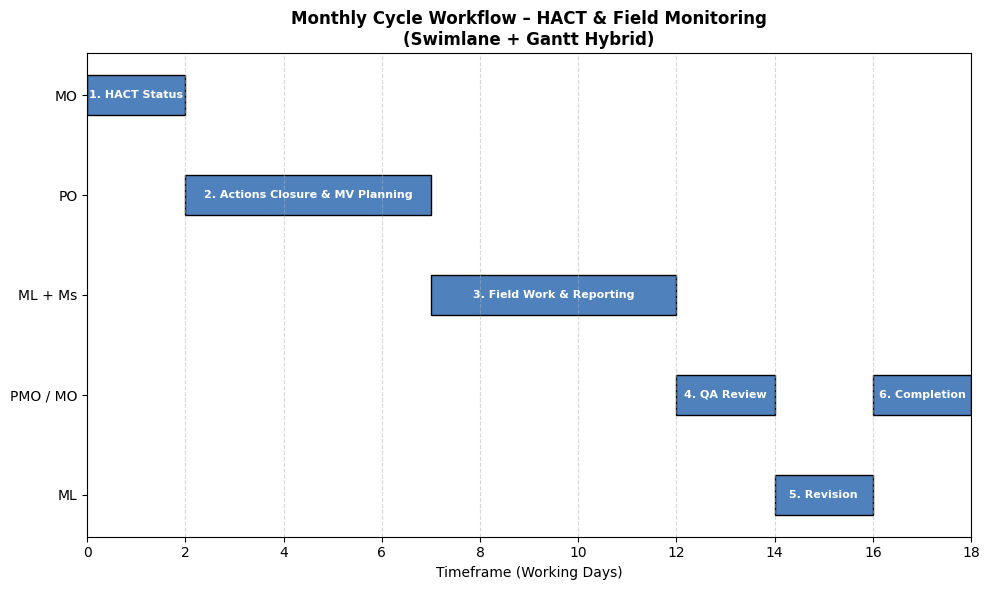

In [4]:
from matplotlib import pyplot as plt
import pandas as pd

# Data for workflow
data = [
    {"Step": "1. HACT Status", "Responsible": "MO", "Start": 0, "Duration": 2},
    {"Step": "2. Actions Closure & MV Planning", "Responsible": "PO", "Start": 2, "Duration": 5},
    {"Step": "3. Field Work & Reporting", "Responsible": "ML + Ms", "Start": 7, "Duration": 5},
    {"Step": "4. QA Review", "Responsible": "PMO / MO", "Start": 12, "Duration": 2},
    {"Step": "5. Revision", "Responsible": "ML", "Start": 14, "Duration": 2},
    {"Step": "6. Completion", "Responsible": "PMO / MO", "Start": 16, "Duration": 2},
]

df = pd.DataFrame(data)

# Assign swimlanes (Responsible parties) to y-axis positions
responsibles = list(df["Responsible"].unique())
lane_positions = {resp: i for i, resp in enumerate(responsibles)}

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df.iterrows():
    ax.barh(
        lane_positions[row["Responsible"]],
        row["Duration"],
        left=row["Start"],
        height=0.4,
        align="center",
        label=row["Responsible"],
        color="#FFD700",
        edgecolor="black"
    )
    ax.text(
        row["Start"] + row["Duration"]/2,
        lane_positions[row["Responsible"]],
        row["Step"],
        va="center",
        ha="center",
        fontsize=8,
        color="white",
        fontweight="bold"
    )

# Format y-axis
ax.set_yticks(range(len(responsibles)))
ax.set_yticklabels(responsibles)
ax.invert_yaxis()

# Format x-axis
ax.set_xlabel("Timeframe (Working Days)", fontsize=10)
ax.set_xlim(0, 18)
ax.set_xticks(range(0, 19, 2))

# Title
ax.set_title("Monthly Cycle Workflow – HACT & Field Monitoring\n(Swimlane + Gantt Hybrid)", fontsize=12, fontweight="bold")

# Grid
ax.grid(axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()
